# Spam Message Classification

# 1) Data Preprocessing

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('spam.tsv', sep='\t')

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isna()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


In [6]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [7]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [8]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [9]:
df['label'].value_counts()/ (len(df))

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [10]:
df['label'].value_counts()      #Here the imbalnced data set

ham     4825
spam     747
Name: label, dtype: int64

In [11]:
ham = df[df['label'] == 'ham']      #Try to make it balnced
spam = df[df['label'] == 'spam']

In [12]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [13]:
spam.shape[0]

747

In [14]:
ham = ham.sample(spam.shape[0])

In [15]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [16]:
data = ham.append(spam, ignore_index=True)

<ipython-input-16-ea3b8d22737f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham.append(spam, ignore_index=True)


In [17]:

data.shape

(1494, 4)

In [18]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [19]:
data.head()

,label,message,length,punct
0,ham,(That said can you text him one more time?),43,3
1,ham,"Arms fine, how's Cardiff and uni?",34,3
2,ham,Ü v ma fan...,13,3
3,ham,hows my favourite person today? r u workin har...,101,4
4,ham,Can you let me know details of fri when u find...,104,3


In [149]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(array([ 3.,  4., 11., 82., 85., 71., 52., 57., 57., 25., 33., 29., 17.,
        22., 14., 16., 12., 16., 12.,  9., 12., 13.,  9., 11.,  7., 20.,
        19.,  3.,  1.,  4.,  2.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,
         2.,  0.,  2.,  0.,  0.,  1.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  4.  ,   9.84,  15.68,  21.52,  27.36,  33.2 ,  39.04,  44.88,
         50.72,  56.56,  62.4 ,  68.24,  74.08,  79.92,  85.76,  91.6 ,
         97.44, 103.28, 109.12, 114.96, 120.8 , 126.64, 132.48, 138.32,
        144.16, 150.  , 155.84, 161.68, 167.52, 173.36, 179.2 , 185.04,
        190.88, 196.72, 202.56, 208.4 , 214.24, 220.08, 225.92, 231.76,
        237.6 , 243.44, 249.28, 255.12, 260.96, 266.8 , 272.64, 278.48,
  

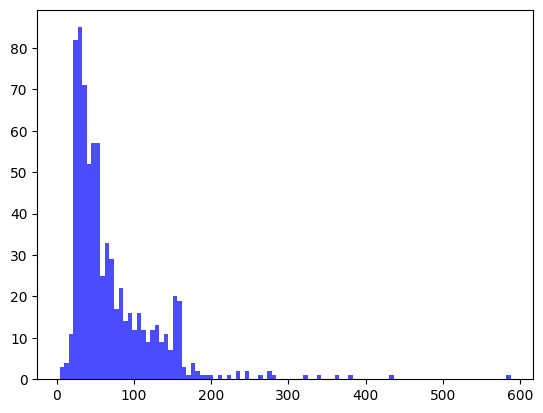

In [27]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7,color='blue')

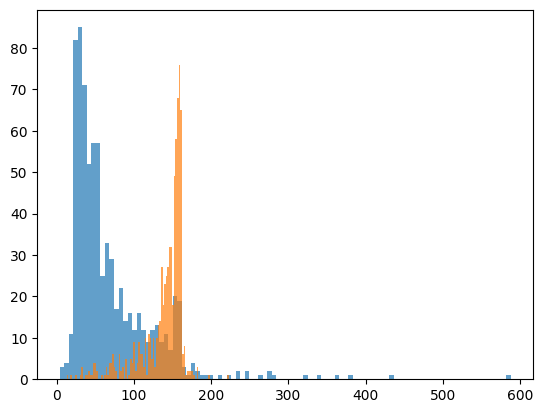

In [20]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.show()

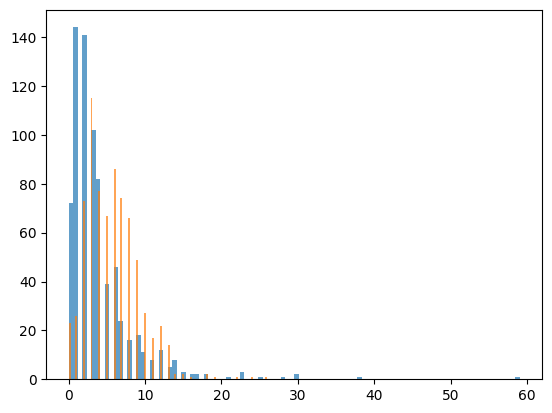

In [28]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

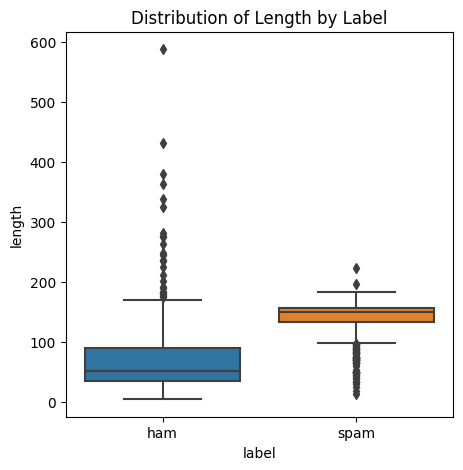

In [43]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='label', y='length', data=data)
plt.title('Distribution of Length by Label')
plt.show()

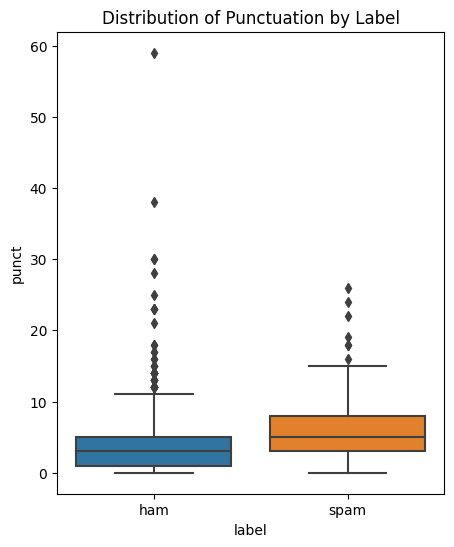

In [44]:
plt.figure(figsize=(5, 6))
sns.boxplot(x='label', y='punct', data=data)
plt.title('Distribution of Punctuation by Label')
plt.show()

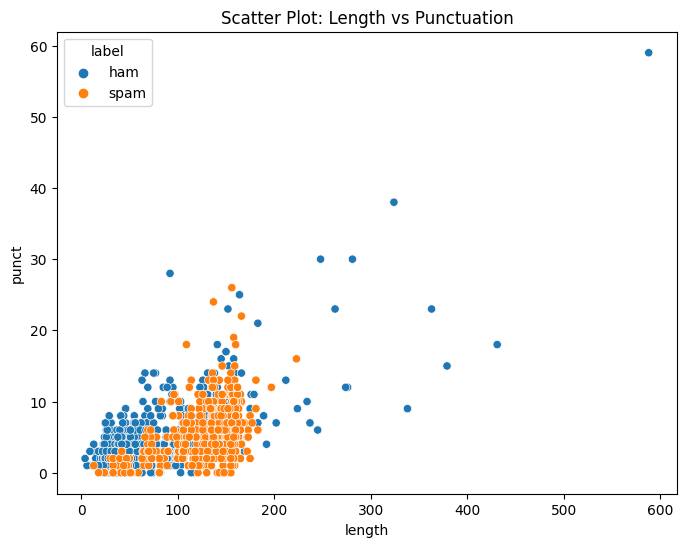

In [45]:
# Scatter plot for 'length' vs 'punctuation'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='length', y='punct', hue='label', data=data)
plt.title('Scatter Plot: Length vs Punctuation')
plt.show()

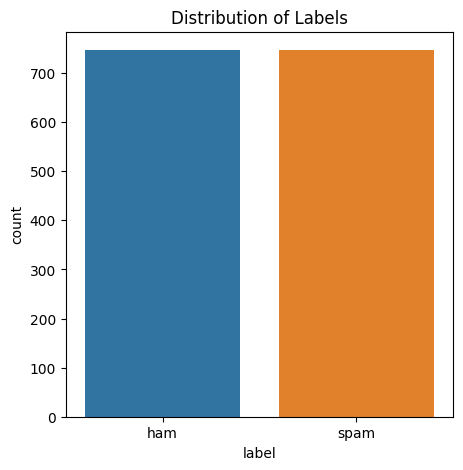

In [46]:
# Bar chart for 'label'
plt.figure(figsize=(5, 5))
sns.countplot(x='label', data=data)
plt.title('Distribution of Labels')
plt.show()

In [48]:
from wordcloud import WordCloud

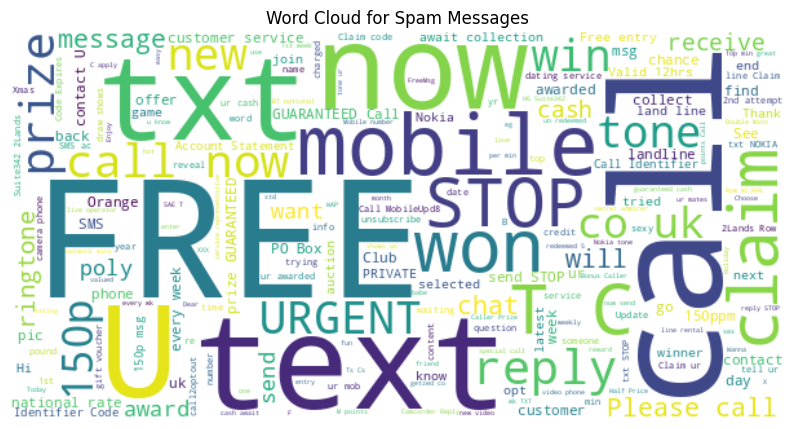

In [53]:
# Word Cloud for 'spam' messages
spam_wordcloud = WordCloud(width=600, height=300, background_color='white').generate(' '.join(data[data['label'] == 'spam']['message']))
plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')
plt.show()

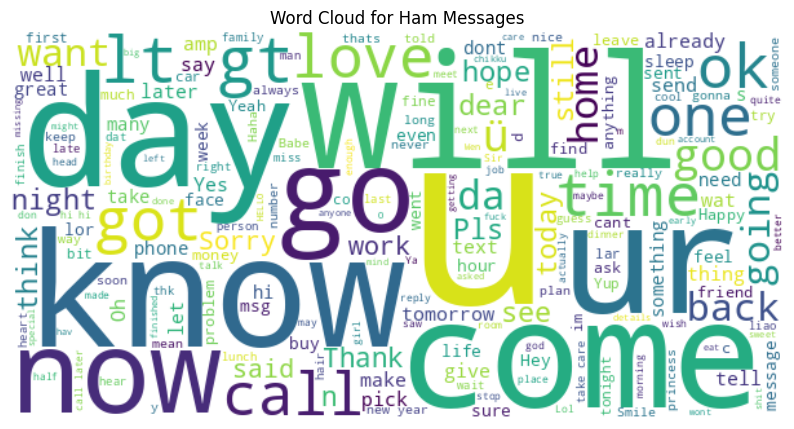

In [54]:
# Word Cloud for 'ham' messages
ham_wordcloud = WordCloud(width=600, height=300, background_color='white').generate(' '.join(data[data['label'] == 'ham']['message']))
plt.figure(figsize=(10, 6))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')
plt.show()

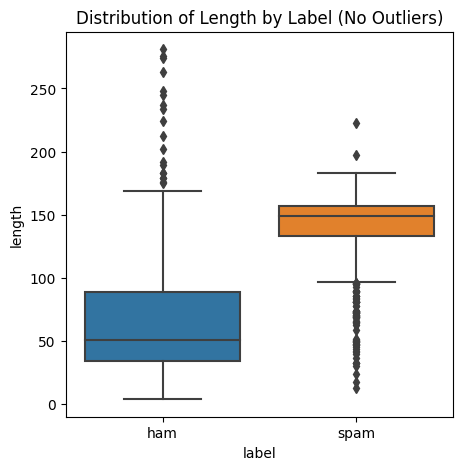

In [60]:
# Calculate the first and third quartiles (Q1 and Q3) and the interquartile range (IQR)
Q1 = data['length'].quantile(0.25)
Q3 = data['length'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to filter out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where 'length' is outside the bounds
data = data[(data['length'] >= lower_bound) & (data['length'] <= upper_bound)]

# Create a boxplot for the data without outliers
plt.figure(figsize=(5, 5))
sns.boxplot(x='label', y='length', data=data)
plt.title('Distribution of Length by Label (No Outliers)')
plt.show()

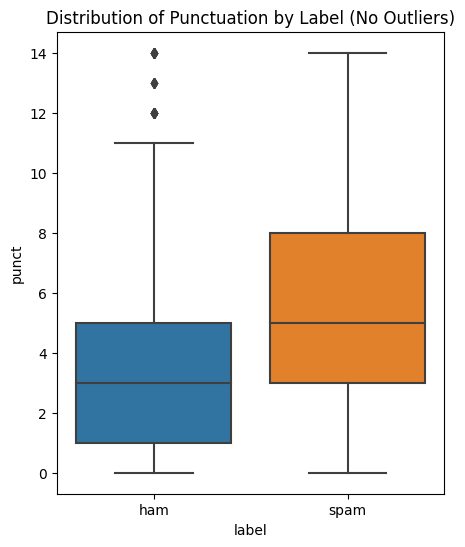

In [61]:
# Calculate the first and third quartiles (Q1 and Q3) and the interquartile range (IQR)
Q1 = data['punct'].quantile(0.25)
Q3 = data['punct'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to filter out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where 'punct' is outside the bounds
data = data[(data['punct'] >= lower_bound) & (data['punct'] <= upper_bound)]

# Create a boxplot for the data without outliers
plt.figure(figsize=(5, 6))
sns.boxplot(x='label', y='punct', data=data)
plt.title('Distribution of Punctuation by Label (No Outliers)')
plt.show()

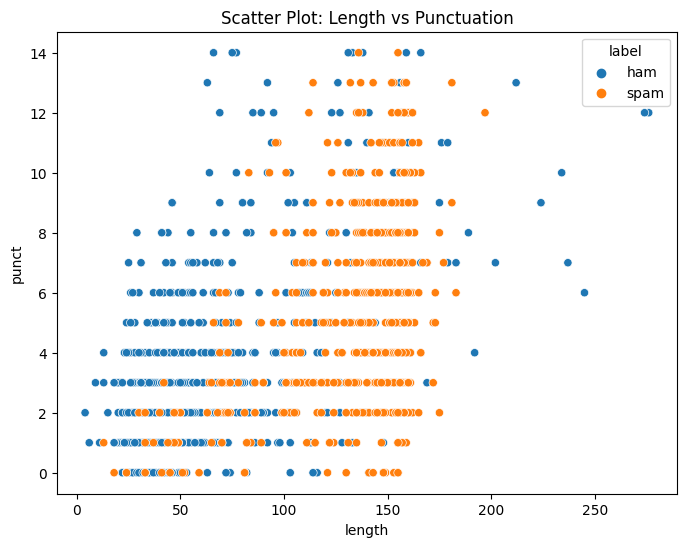

In [62]:
# Scatter plot for 'length' vs 'punctuation'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='length', y='punct', hue='label', data=data)
plt.title('Scatter Plot: Length vs Punctuation')
plt.show()

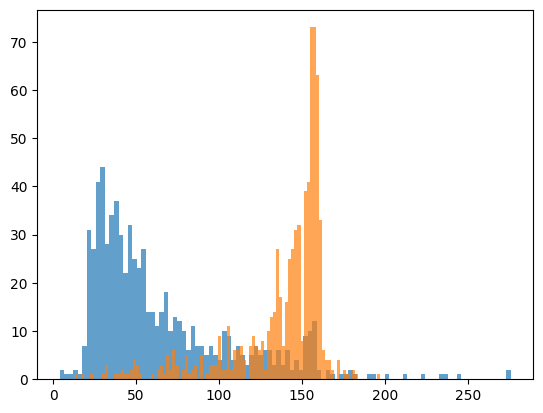

In [63]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.show()

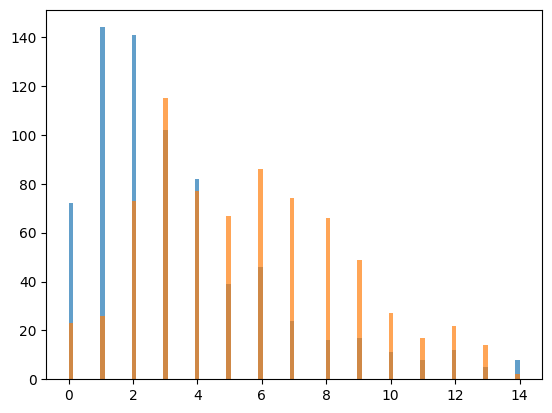

In [64]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

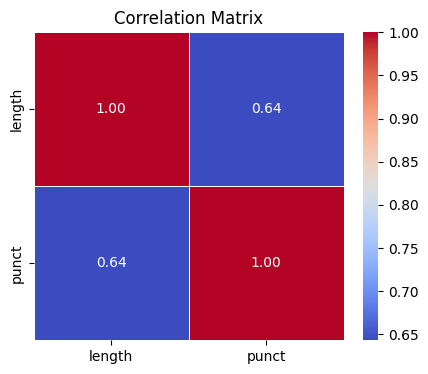

In [68]:
# Select numeric columns for correlation analysis
numeric_columns = ['length', 'punct']

# Create a subset DataFrame with numeric columns
numeric_df = df[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap for visualizing the correlation matrix
plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [69]:
data

,label,message,length,punct
0,ham,(That said can you text him one more time?),43,3
1,ham,"Arms fine, how's Cardiff and uni?",34,3
2,ham,Ü v ma fan...,13,3
3,ham,hows my favourite person today? r u workin har...,101,4
4,ham,Can you let me know details of fri when u find...,104,3
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test =  train_test_split(data['message'], data['label'], test_size = 0.3, random_state =0, shuffle = True)

In [72]:
1494 * 0.3

448.2

In [73]:
X_train.shape

(1025,)

In [74]:
X_test.shape

(440,)

# 2) Building the Model (Random Forest)

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [76]:
#The TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer is commonly used in natural language processing and information retrieval tasks. It is a feature extraction technique that transforms a collection of text documents into numerical vectors, considering both the frequency of terms and their importance in the entire document collection.

In [ ]:
#we use TfidfVectorizer to convert a collection of text documents into numerical features that can be used as input for machine learning algorithms.

In [77]:
# It allows you to assemble a series of data processing steps, including feature extraction, transformation, and model training, into a single pipeline.

In [93]:
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=100))])

In [94]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

# 3) Predicting the results (Random Forest)

In [85]:
y_pred = classifier.predict(X_test)

In [86]:
y_test, y_pred

(1016    spam
 451      ham
 766     spam
 674      ham
 32       ham
         ... 
 1155    spam
 731      ham
 10       ham
 1055    spam
 711      ham
 Name: label, Length: 440, dtype: object,
 array(['spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam',
        'ham', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham',
        'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
        'spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'spam', 'ham',
        'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ha

In [87]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [88]:
accuracy_score(y_test, y_pred)

0.95

In [89]:
0.9465478841870824 * 449 #Out of 449 we got 425 correct smaples right.

425.0

In [90]:
confusion_matrix(y_test, y_pred)

array([[227,   0],
       [ 22, 191]])

In [95]:
from sklearn.metrics import confusion_matrix

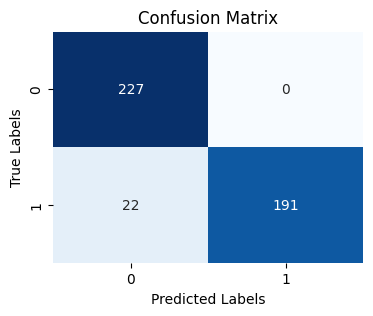

In [98]:
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       227
        spam       1.00      0.90      0.95       213

    accuracy                           0.95       440
   macro avg       0.96      0.95      0.95       440
weighted avg       0.95      0.95      0.95       440



# 4) Building the Model (SVM)

In [99]:
from sklearn.svm import SVC

In [128]:
svm = Pipeline([("tfidf", TfidfVectorizer()) , ("SVM", SVC(C = 100, gamma='auto'))])

In [129]:
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('SVM', SVC(C=100, gamma='auto'))])

# 5) Predicting the results (SVM)

In [102]:
y_pred = svm.predict(X_test)

In [103]:
accuracy_score(y_test, y_pred)

0.9431818181818182

In [104]:
confusion_matrix(y_test, y_pred)

array([[207,  20],
       [  5, 208]])

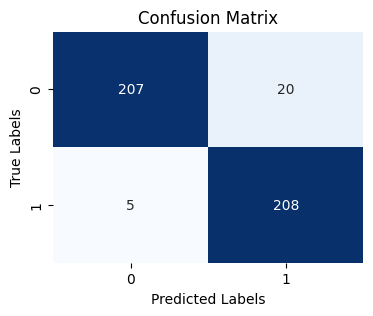

In [106]:
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.91      0.94       227
        spam       0.91      0.98      0.94       213

    accuracy                           0.94       440
   macro avg       0.94      0.94      0.94       440
weighted avg       0.95      0.94      0.94       440



### **Building the Model (GridSerach CV)**

In [118]:
# Define the hyperparameter grid to search
param_grid = {
    'tfidf__max_features': [1000, 5000, 10000],  # Example TF-IDF hyperparameter
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
# Create GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [122]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('classifier',
                                        SVC(C=100, gamma='auto'))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': ['scale', 'auto'],
                         'classifier__kernel': ['linear', 'rbf'],
                         'tfidf__max_features': [1000, 5000, 10000]},
             scoring='accuracy')

In [124]:
# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [125]:
# Print the best parameters
print("Best Parameters:")
print(best_params)

Best Parameters:
{'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf', 'tfidf__max_features': 5000}


In [126]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2f}")

Test Set Accuracy: 0.96


In [131]:
accuracy_score(y_test, y_pred)

0.9636363636363636

In [132]:
confusion_matrix(y_test, y_pred)

array([[221,   6],
       [ 10, 203]])

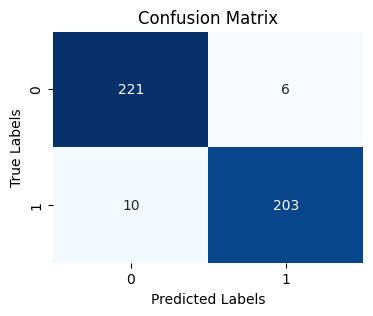

In [133]:
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.96      0.97      0.97       227
        spam       0.97      0.95      0.96       213

    accuracy                           0.96       440
   macro avg       0.96      0.96      0.96       440
weighted avg       0.96      0.96      0.96       440



## **Building the Model (Logistic Regression)**

In [130]:
from sklearn.linear_model import LogisticRegression

In [135]:
# Define the hyperparameter grid to search
param_grid = {
    'tfidf__max_features': [1000, 5000, 10000],  # Example TF-IDF hyperparameter
    'classifier__C': [0.1, 1, 10],
    'classifier__max_iter': [100, 200, 300]
}

In [141]:
logreg_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # TF-IDF vectorization for text features
    ('classifier', LogisticRegression())  # Logistic Regression classifier
])

In [142]:
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [143]:
# Make predictions on the test set
y_pred = logreg_pipeline.predict(X_test)

In [144]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2f}")

Test Set Accuracy: 0.95


In [145]:
confusion_matrix(y_test, y_pred)

array([[215,  12],
       [  9, 204]])

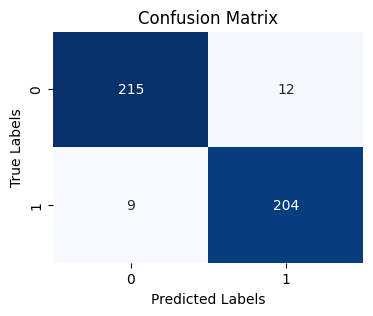

In [146]:
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.96      0.95      0.95       227
        spam       0.94      0.96      0.95       213

    accuracy                           0.95       440
   macro avg       0.95      0.95      0.95       440
weighted avg       0.95      0.95      0.95       440



## **Testing all classifiers**

In [107]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [108]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [109]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']


In [127]:
print(grid_search.predict(test1))
print(grid_search.predict(test2))
print(grid_search.predict(test3))

['ham']
['ham']
['spam']
